In [1]:
import numpy as np
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("IMDB_Dataset.csv")[:10000]
dataset['sentiment'] = dataset['sentiment'].replace(['positive','negative'],[1, 0])
dataset

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
...,...,...
9995,"Fun, entertaining movie about WWII German spy ...",1
9996,Give me a break. How can anyone say that this ...,0
9997,This movie is a bad movie. But after watching ...,0
9998,This is a movie that was probably made to ente...,0


In [3]:
dataset.isnull().sum()

review       0
sentiment    0
dtype: int64

([<matplotlib.axis.XTick at 0x2af50dfeac0>,
 [Text(0, 0, ''), Text(0, 0, '')])

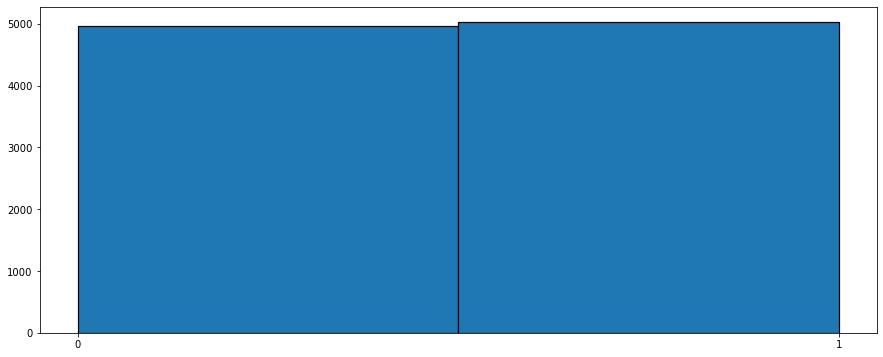

In [4]:
plt.figure(figsize=(15, 6))
plt.hist(dataset['sentiment'], bins=2, edgecolor='black', linewidth=1.2)
plt.xticks((0, 1))

In [5]:
def clean_review(text: str):
    """
    Receives a raw review and clean it using the following steps:
    1. Remove all non-words
    2. Transform the review in lower case
    3. Remove all stop words
    4. Perform stemming

    Args:
        text: the review that iwill be cleaned
    Returns:
        a clean review using the mentioned steps above.
    """
    text = re.sub(r"([.]{1,4})|(<br /><br />)|[^A-Za-z ]", " ", text)
    text = re.sub(r"\s+", " ", text)
    text = text.lower()
    text = word_tokenize(text)
    lemmatizer = WordNetLemmatizer()
    text = [lemmatizer.lemmatize(word) for word in text if word not in set(stopwords.words("english"))]
    text = " ".join(text)
    return text

In [6]:
def preprocess(text_data: pd.DataFrame) -> np.ndarray:
    corpus = []
    for i in range(0, len(text_data)):
        review = clean_review(text_data[i])
        corpus.append(review)
    count_vectorizer = CountVectorizer()
    features = count_vectorizer.fit_transform(corpus).toarray()
    return features

In [8]:
features = preprocess(text_data=dataset.review)
X_train, X_test, y_train, y_test = train_test_split(features,
                                                    dataset.sentiment,
                                                    test_size=0.2,
                                                    random_state=42)

{'one': 28656, 'reviewer': 34107, 'mentioned': 25730, 'watching': 44472, 'oz': 29278, 'episode': 13323, 'hooked': 19111, 'right': 34305, 'exactly': 13721, 'happened': 18040, 'first': 14909, 'thing': 40929, 'struck': 39225, 'brutality': 5189, 'unflinching': 42807, 'scene': 35587, 'violence': 43977, 'set': 36316, 'word': 45343, 'go': 16853, 'trust': 42075, 'show': 36810, 'faint': 14182, 'hearted': 18386, 'timid': 41180, 'pull': 32119, 'punch': 32147, 'regard': 33328, 'drug': 12041, 'sex': 36367, 'hardcore': 18074, 'classic': 7237, 'use': 43374, 'called': 5697, 'nickname': 27816, 'given': 16687, 'oswald': 28948, 'maximum': 25275, 'security': 36032, 'state': 38713, 'penitentary': 30033, 'focus': 15253, 'mainly': 24564, 'emerald': 12884, 'city': 7163, 'experimental': 13929, 'section': 36024, 'prison': 31656, 'cell': 6350, 'glass': 16727, 'front': 15809, 'face': 14129, 'inwards': 20954, 'privacy': 31663, 'high': 18741, 'agenda': 674, 'em': 12817, 'home': 19018, 'many': 24847, 'aryan': 2102, 

In [9]:
from sklearn.ensemble import RandomForestClassifier

In [10]:
random_forest = RandomForestClassifier()
random_forest.fit(X=X_train,
                  y=y_train)
random_forest.score(X=X_test,
                    y=y_test)

0.847

In [18]:
random_forest.n_features_

E:\Conda\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


46070